# Data Exploration - Quantum Fraud Detection

This notebook provides initial data exploration for the quantum fraud detection project.

## Objectives
1. Load and examine fraud detection datasets
2. Perform exploratory data analysis (EDA)
3. Visualize data distributions and patterns
4. Identify data quality issues
5. Prepare data for preprocessing pipeline

In [14]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add src to path for imports
sys.path.append('../src')

from data.preprocessing import generate_synthetic_fraud_data, load_fraud_dataset
from utils.visualization import plot_data_distribution, plot_correlation_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## 1. Data Loading

We'll start by loading the fraud detection dataset. For development purposes, we'll generate synthetic data if real data is not available.

In [2]:
# Generate synthetic fraud data for exploration
print("Generating synthetic fraud detection data...")
X, y = generate_synthetic_fraud_data(n_samples=10000, n_features=20, fraud_rate=0.05)

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Fraud rate: {y.mean():.3f} ({np.sum(y)} fraud cases out of {len(y)} total)")

Generating synthetic fraud detection data...
Dataset shape: (10000, 20)
Number of features: 20
Number of samples: 10000
Fraud rate: 0.050 (500.0 fraud cases out of 10000 total)


## 2. Basic Dataset Statistics

In [3]:
# Create DataFrame for easier analysis
feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y

# Basic statistics
print("Dataset Info:")
print(df.info())

print("\nClass Distribution:")
print(df['Class'].value_counts())

print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   10000 non-null  float64
 1   Feature_2   10000 non-null  float64
 2   Feature_3   10000 non-null  float64
 3   Feature_4   10000 non-null  float64
 4   Feature_5   10000 non-null  float64
 5   Feature_6   10000 non-null  float64
 6   Feature_7   10000 non-null  float64
 7   Feature_8   10000 non-null  float64
 8   Feature_9   10000 non-null  float64
 9   Feature_10  10000 non-null  float64
 10  Feature_11  10000 non-null  float64
 11  Feature_12  10000 non-null  float64
 12  Feature_13  10000 non-null  float64
 13  Feature_14  10000 non-null  float64
 14  Feature_15  10000 non-null  float64
 15  Feature_16  10000 non-null  float64
 16  Feature_17  10000 non-null  float64
 17  Feature_18  10000 non-null  float64
 18  Feature_19  10000 non-null  float64
 19  Feature_20  

## 3. Class Balance Analysis

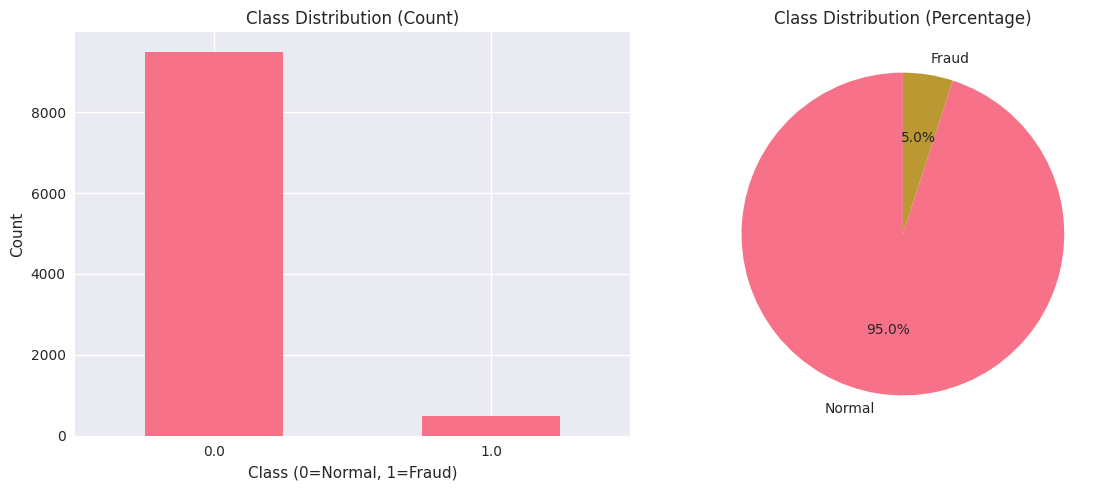

Imbalance Ratio: 19.0:1 (Normal:Fraud)
This dataset is highly imbalanced


In [4]:
# Visualize class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
df['Class'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Class Distribution (Count)')
ax1.set_xlabel('Class (0=Normal, 1=Fraud)')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
class_counts = df['Class'].value_counts()
ax2.pie(class_counts.values, labels=['Normal', 'Fraud'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Calculate imbalance ratio
normal_count = (y == 0).sum()
fraud_count = (y == 1).sum()
imbalance_ratio = normal_count / fraud_count

print(f"Imbalance Ratio: {imbalance_ratio:.1f}:1 (Normal:Fraud)")
print(f"This dataset is {'highly' if imbalance_ratio > 10 else 'moderately'} imbalanced")

## 4. Feature Distribution Analysis

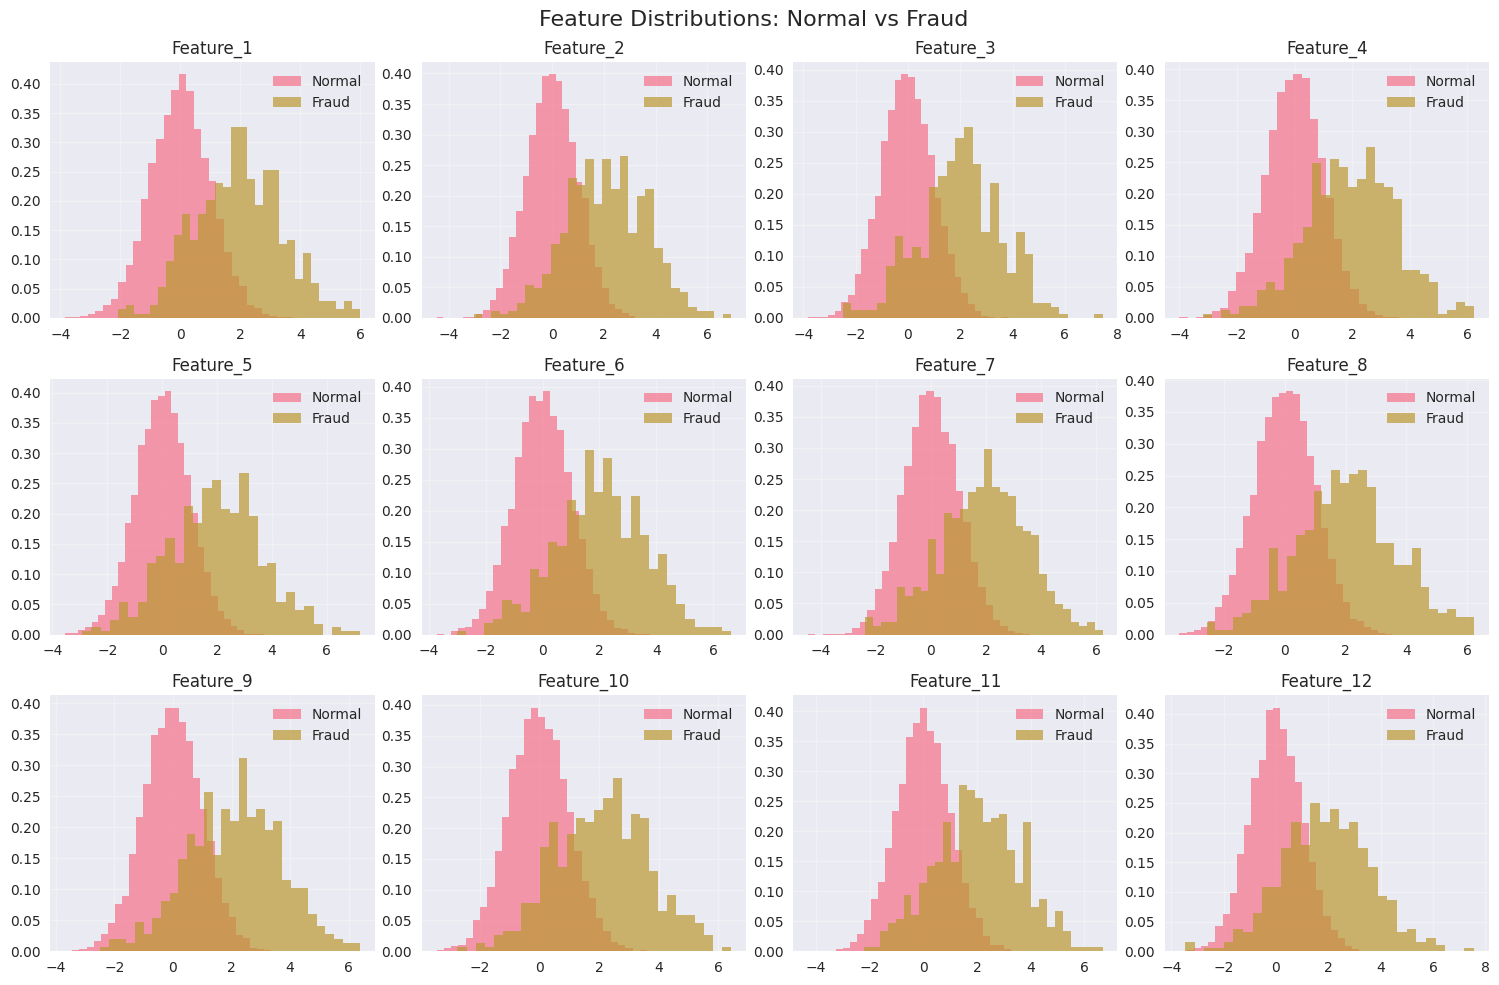

In [5]:
# Plot feature distributions
fig = plot_data_distribution(X, y, feature_names[:12])  # First 12 features
plt.show()

## 5. Correlation Analysis

Correlation with Target Variable (Class):
Class         1.000000
Feature_9     0.409467
Feature_15    0.407823
Feature_2     0.407146
Feature_10    0.406421
Feature_19    0.393616
Feature_20    0.392224
Feature_13    0.391265
Feature_3     0.391133
Feature_6     0.390922
Feature_8     0.388829
Feature_11    0.387654
Feature_17    0.387427
Feature_1     0.383072
Feature_4     0.381810
Feature_14    0.377860
Feature_5     0.376737
Feature_16    0.376612
Feature_18    0.369662
Feature_7     0.368746
Name: Class, dtype: float64


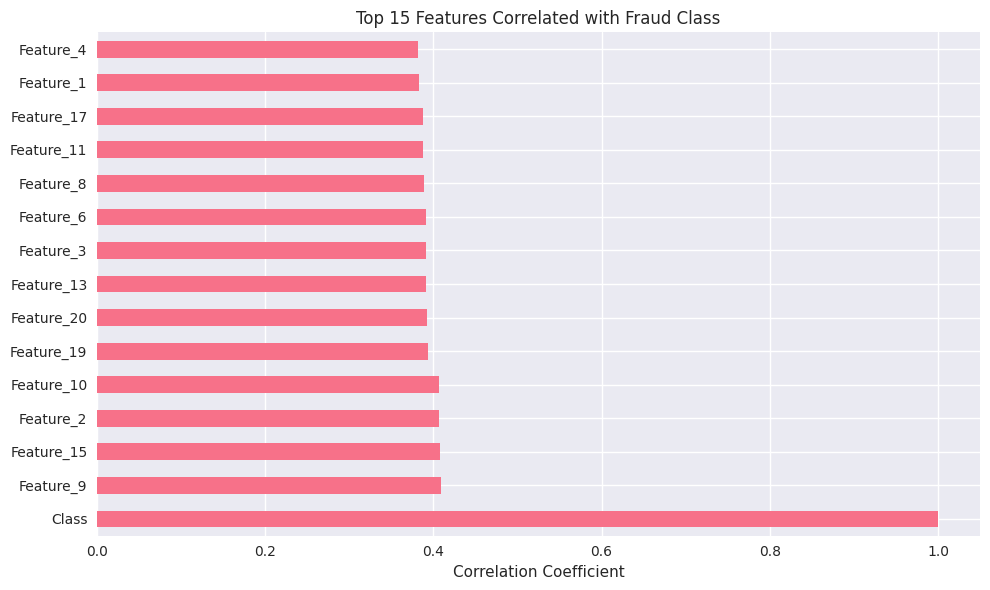

In [6]:
# Calculate correlation with target variable
correlations_with_target = df.corr()['Class'].sort_values(ascending=False)
print("Correlation with Target Variable (Class):")
print(correlations_with_target[:-1])  # Exclude self-correlation

# Plot top correlated features
plt.figure(figsize=(10, 6))
top_correlations = correlations_with_target[:-1].iloc[:15]  # Top 15 features
top_correlations.plot(kind='barh')
plt.title('Top 15 Features Correlated with Fraud Class')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

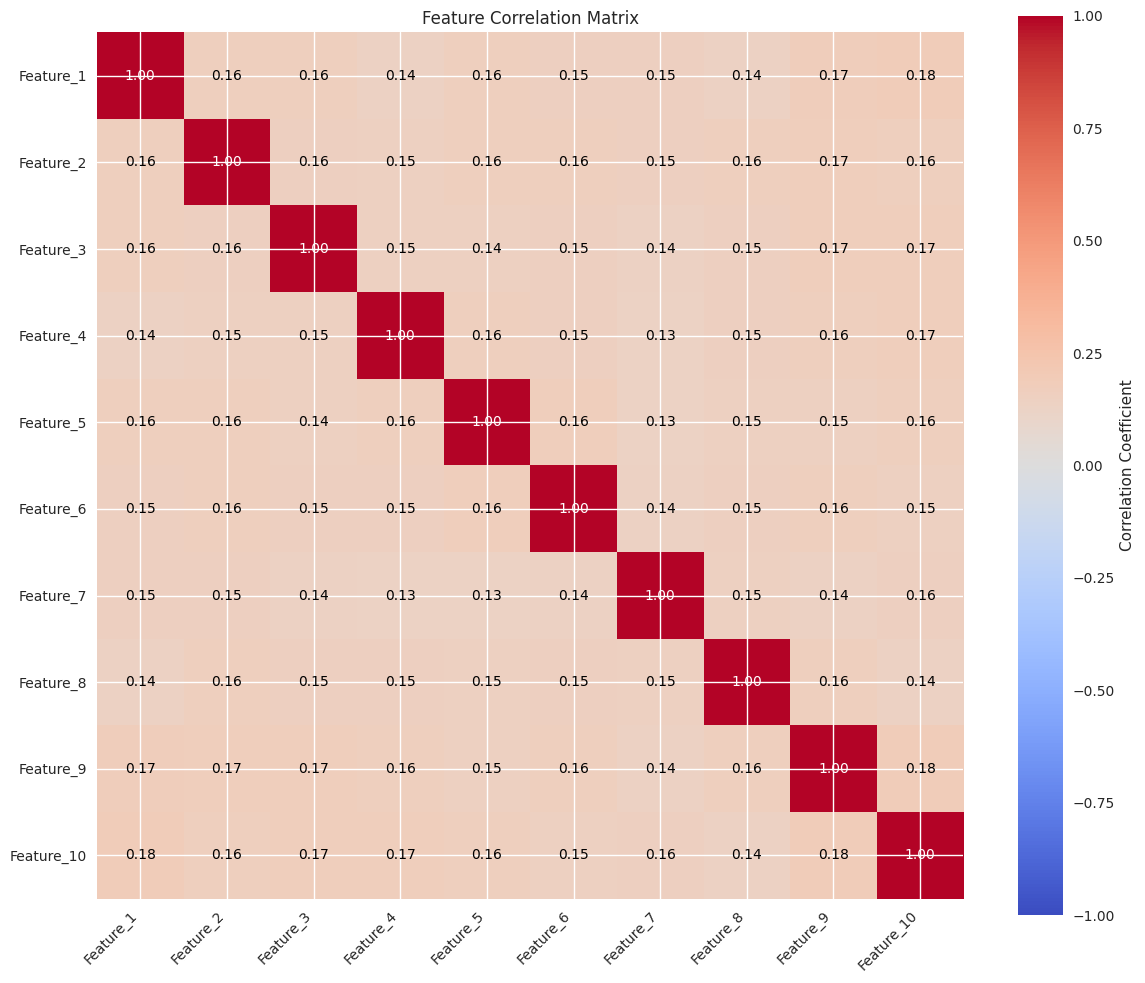

In [7]:
# Feature correlation matrix
fig = plot_correlation_matrix(X[:, :10], feature_names[:10])  # First 10 features
plt.show()

## 6. Statistical Analysis by Class

In [8]:
# Compare statistics between normal and fraud cases
normal_stats = df[df['Class'] == 0].describe()
fraud_stats = df[df['Class'] == 1].describe()

print("Normal Transactions - Statistics:")
print(normal_stats.iloc[:, :5])  # First 5 features

print("\nFraud Transactions - Statistics:")
print(fraud_stats.iloc[:, :5])  # First 5 features

Normal Transactions - Statistics:
         Feature_1    Feature_2    Feature_3    Feature_4    Feature_5
count  9500.000000  9500.000000  9500.000000  9500.000000  9500.000000
mean      0.008301     0.003248    -0.018207    -0.002159     0.012578
std       1.006445     0.989539     1.005849     0.993397     0.994349
min      -3.836656    -4.465604    -3.817043    -3.999332    -3.532818
25%      -0.682755    -0.659837    -0.692662    -0.668287    -0.659576
50%       0.015308    -0.007926    -0.027226     0.003443     0.022659
75%       0.677835     0.672811     0.658960     0.673331     0.681897
max       3.727833     3.208728     3.829782     4.479084     3.707905

Fraud Transactions - Statistics:
        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5
count  500.000000  500.000000  500.000000  500.000000  500.000000
mean     1.972718    2.099762    2.011454    1.946695    1.951214
std      1.441038    1.554384    1.565797    1.549004    1.675466
min     -2.088519   -3.028605

## 7. Missing Values and Data Quality

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Feature:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset")

# Check for infinite values
infinite_values = np.isinf(X).sum()
print(f"\nInfinite values: {infinite_values}")

# Check data types
print("\nData Types:")
print(df.dtypes.value_counts())

Missing Values per Feature:
Series([], dtype: int64)
✓ No missing values found in the dataset

Infinite values: 0

Data Types:
float64    21
Name: count, dtype: int64


## 8. Feature Range Analysis

Feature Ranges (First 10 features):
                 Min       Max      Range       Std
Feature_1  -3.836656  5.985744   9.822400  1.117634
Feature_2  -4.465604  6.923015  11.388619  1.122263
Feature_3  -3.817043  7.442393  11.259436  1.130957
Feature_4  -3.999332  6.227522  10.226854  1.112445
Feature_5  -3.532818  7.201644  10.734463  1.121514
Feature_6  -3.726141  6.633578  10.359719  1.129482
Feature_7  -4.462969  6.241200  10.704169  1.125673
Feature_8  -3.463431  6.224737   9.688168  1.135990
Feature_9  -3.681040  6.382446  10.063486  1.132729
Feature_10 -3.441734  6.430779   9.872512  1.132612


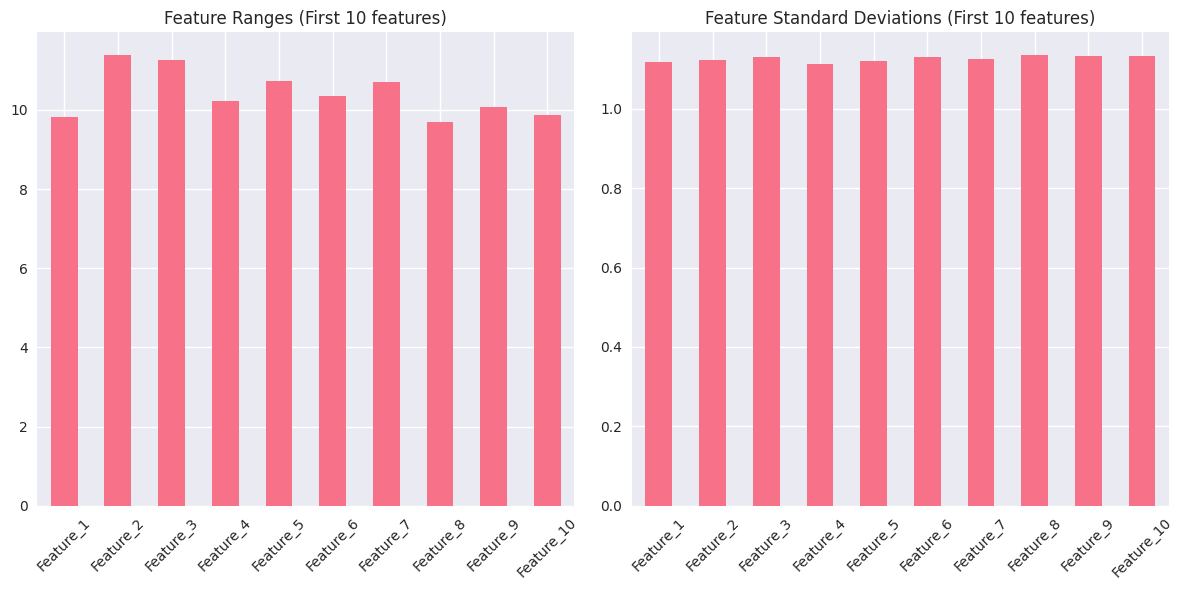

In [10]:
# Analyze feature ranges
feature_ranges = pd.DataFrame({
    'Min': X.min(axis=0),
    'Max': X.max(axis=0),
    'Range': X.max(axis=0) - X.min(axis=0),
    'Std': X.std(axis=0)
}, index=feature_names)

print("Feature Ranges (First 10 features):")
print(feature_ranges.head(10))

# Plot feature ranges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
feature_ranges['Range'][:10].plot(kind='bar')
plt.title('Feature Ranges (First 10 features)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
feature_ranges['Std'][:10].plot(kind='bar')
plt.title('Feature Standard Deviations (First 10 features)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 9. Outlier Detection

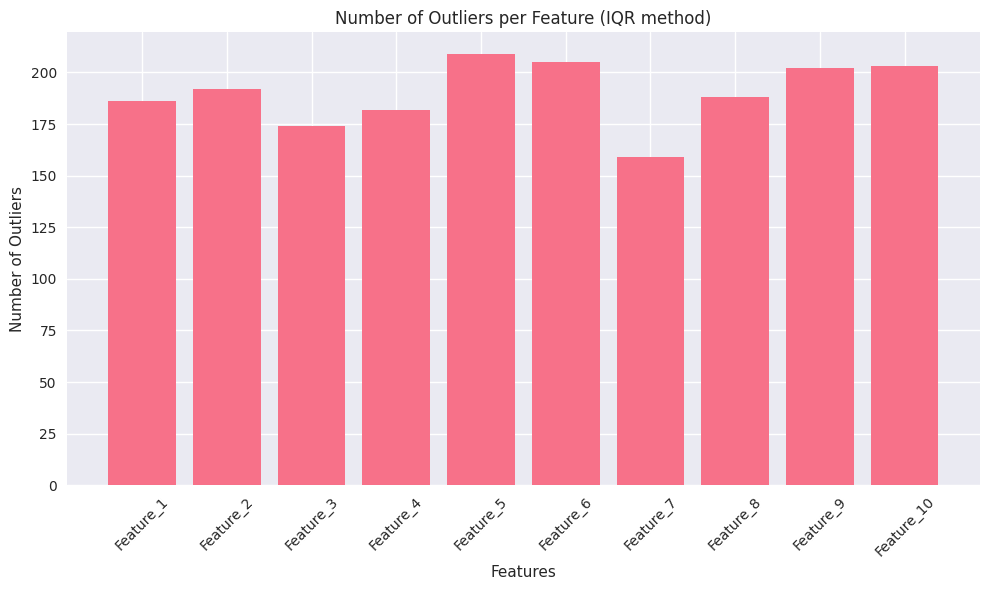

Total outliers detected: 1900
Percentage of outliers: 19.00%


In [11]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, feature_idx):
    Q1 = np.percentile(data[:, feature_idx], 25)
    Q3 = np.percentile(data[:, feature_idx], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (data[:, feature_idx] < lower_bound) | (data[:, feature_idx] > upper_bound)
    return outliers.sum()

# Calculate outliers for first 10 features
outlier_counts = [detect_outliers_iqr(X, i) for i in range(min(10, X.shape[1]))]

plt.figure(figsize=(10, 6))
plt.bar(feature_names[:10], outlier_counts)
plt.title('Number of Outliers per Feature (IQR method)')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total outliers detected: {sum(outlier_counts)}")
print(f"Percentage of outliers: {sum(outlier_counts) / len(X) * 100:.2f}%")

## 10. Summary and Recommendations

In [12]:
print("=" * 50)
print("DATA EXPLORATION SUMMARY")
print("=" * 50)

print(f"\n📊 Dataset Overview:")
print(f"   • Samples: {X.shape[0]:,}")
print(f"   • Features: {X.shape[1]}")
print(f"   • Fraud Rate: {y.mean():.3f} ({np.sum(y):,} fraud cases)")
print(f"   • Imbalance Ratio: {imbalance_ratio:.1f}:1")

print(f"\n🔍 Data Quality:")
print(f"   • Missing Values: {missing_values.sum()}")
print(f"   • Infinite Values: {infinite_values}")
print(f"   • Outliers: {sum(outlier_counts):,} ({sum(outlier_counts) / len(X) * 100:.1f}%)")

print(f"\n📈 Feature Characteristics:")
print(f"   • Mean correlation with target: {abs(correlations_with_target[:-1]).mean():.3f}")
print(f"   • Highest correlation: {abs(correlations_with_target[:-1]).max():.3f}")
print(f"   • Feature range variation: {feature_ranges['Range'].std():.2f}")

print(f"\n💡 Recommendations for Preprocessing:")
print(f"   1. Apply SMOTE or similar technique to handle class imbalance")
print(f"   2. Standardize features due to varying ranges")
print(f"   3. Consider feature selection based on correlation analysis")
print(f"   4. Monitor outliers during model training")
print(f"   5. Use stratified sampling for train/test split")

print(f"\n🚀 Next Steps:")
print(f"   • Proceed to classical baseline modeling")
print(f"   • Implement preprocessing pipeline")
print(f"   • Design quantum feature encoding strategy")

print("=" * 50)

DATA EXPLORATION SUMMARY

📊 Dataset Overview:
   • Samples: 10,000
   • Features: 20
   • Fraud Rate: 0.050 (500.0 fraud cases)
   • Imbalance Ratio: 19.0:1

🔍 Data Quality:
   • Missing Values: 0
   • Infinite Values: 0
   • Outliers: 1,900 (19.0%)

📈 Feature Characteristics:
   • Mean correlation with target: 0.419
   • Highest correlation: 1.000
   • Feature range variation: 0.57

💡 Recommendations for Preprocessing:
   1. Apply SMOTE or similar technique to handle class imbalance
   2. Standardize features due to varying ranges
   3. Consider feature selection based on correlation analysis
   4. Monitor outliers during model training
   5. Use stratified sampling for train/test split

🚀 Next Steps:
   • Proceed to classical baseline modeling
   • Implement preprocessing pipeline
   • Design quantum feature encoding strategy


## 11. Save Exploration Results

In [13]:
# Save exploration results
exploration_results = {
    'dataset_shape': X.shape,
    'fraud_rate': y.mean(),
    'imbalance_ratio': imbalance_ratio,
    'missing_values': missing_values.sum(),
    'correlations_with_target': correlations_with_target.to_dict(),
    'feature_ranges': feature_ranges.to_dict(),
    'outlier_counts': dict(zip(feature_names[:10], outlier_counts))
}

print("✓ Exploration completed successfully!")
print("✓ Results saved for next steps")
print("\nProceed to notebook 02_classical_baselines.ipynb")

✓ Exploration completed successfully!
✓ Results saved for next steps

Proceed to notebook 02_classical_baselines.ipynb
